# Phase estimation algorithms
This notebook is devoted to phase estimation algorithm.
It starts with the direct phase estimation algorithms and then tests iterative phase estimation algorithm.

The standard phase estimation algorithm looks like this:
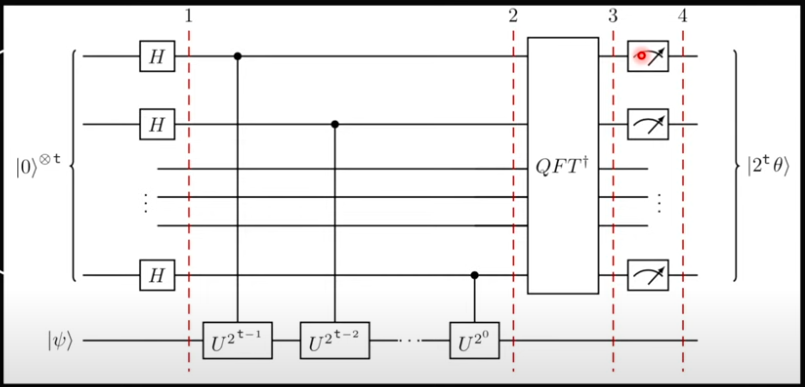

The algorithm is used to estimate a phase of the eigenvalue of the operator U. This assums that the magnitude of the eigenvalue is 1.

The result of the phase estimation is the upper t qubits after the IQFT.

The input to the operators U should be an eigenvalue of the operator U.

Depending on the eigenvalue the phase maybe different (opposite).

If we send some arbitrary state, then the output would be two number showing the phase of all eigenvalues in proportion of eigenstates in the input state.

The phase \theta is represented as a number between 0 ant 1 (1 corresponds to 2pi phase). After measureing the resulting qubits state we get a binary number. Actually, this is the part of the binary number going after point. \theta = a_1 / 2 + a2 / 4 + a3 / 8 + ... a_t /2^(t-1) = 0. a1 a2 a3 .. a_t.

It defines the precision of the phase estimation.

## Notes on the circuits below
1. The resulting phase is a binary number. The highest bit of this number is the lowest bit in the circuit.
2. Note that when you do rotation by angle pi, the accumulated phase is pi/2, and the resulting number for the phase will be 1/8 = 0.001 (in binary system) (1/8 of 2*pi).
3. Negative phase will be shown as 2*pi - phase. So, it will still be a positive number.


## Literature

1. https://github.com/DavitKhach/quantum-algorithms-tutorials/blob/master/iterative_quantum_phase_estimation.ipynb
2. Nice video: Iterative Quantum Phase Estimation | Qiskit Global Summer School 2023, https://www.youtube.com/watch?v=aLSM0_H8hUE



In [32]:
#Classical programmig libraries
import math

#Circuit design
import qiskit
from qiskit import QuantumRegister as Q_R
from qiskit import ClassicalRegister as C_R

#Circuit execution
from qiskit_aer import Aer
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator

#operator visualization
from qiskit.quantum_info import Operator
from qiskit.visualization import array_to_latex

#adding my own libraries
import sys
sys.path
sys.path.insert(0, 'C:/Users/Oleg/Google Диск/QC/Codes/QC-qiskit-codes/Shor')
import quantum_routines as qr

In [77]:
gate = qiskit.circuit.library.RXGate(-math.pi).control(1)
op = Operator(gate)
array_to_latex(op)

<IPython.core.display.Latex object>

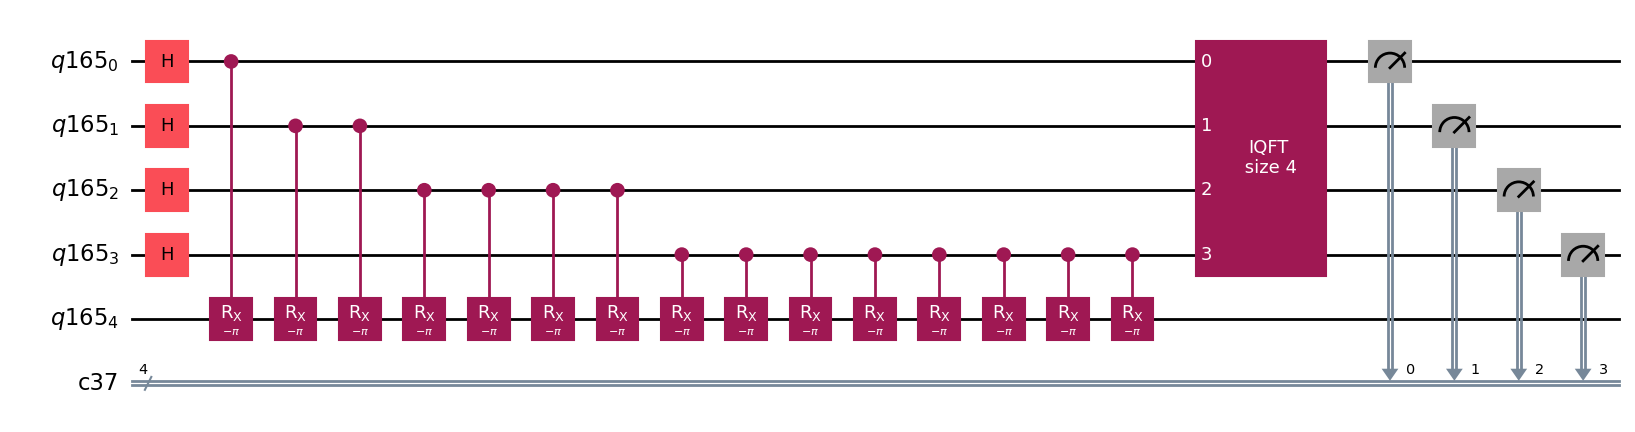

In [78]:
phase_precision = 4

u_size = 1

q_reg = Q_R(phase_precision + u_size)
cl_reg = C_R(phase_precision)

pe_circ = qiskit.QuantumCircuit(q_reg,cl_reg)

for i in range(phase_precision):
    pe_circ.h(q_reg[i])

#pe_circ.h(q_reg[phase_precision])



for i in range(phase_precision):
    q_list = [i, phase_precision + u_size - 1]
    for j in range(int(math.pow(2,i))):
        pe_circ.append(gate, q_list)


instr = qr.IQFTn_instr(phase_precision)
q_ins = []
for i in range(phase_precision):
    q_ins.append(q_reg[i])
pe_circ.append(instr, q_ins)

pe_circ = qr.qubits_meas(q_ins, cl_reg, pe_circ)

pe_circ.draw('mpl')

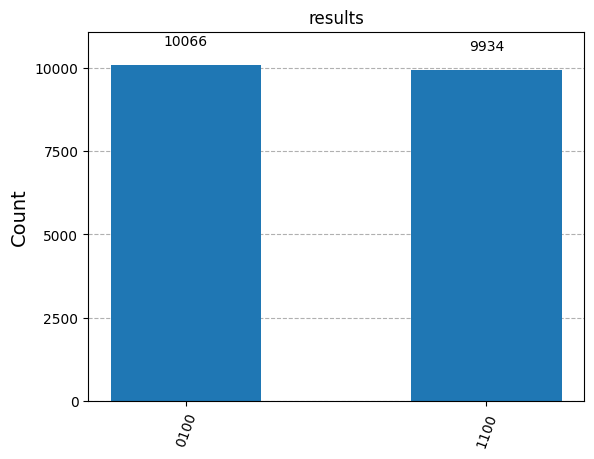

In [79]:
qr.plot_hyst_func(pe_circ,20000)

# Iterative phase estimation

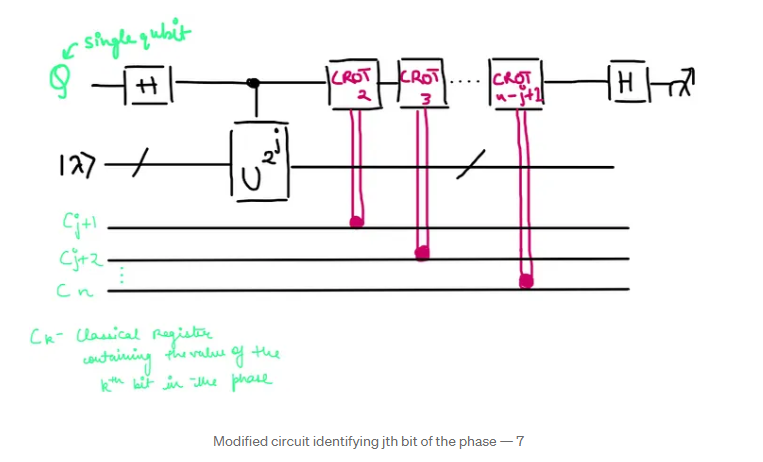


## Literature
1. https://medium.com/quantum-untangled/iterative-quantum-phase-estimation-qpe-algorithms-ced794341487
2. Nice video: Iterative Quantum Phase Estimation | Qiskit Global Summer School 2023, https://www.youtube.com/watch?v=aLSM0_H8hUE